# Lab 5: Wide and Deep Networks For Predicting Diamond Prices

A machine learning engineer is in a long-term committed relationship and is planning to propose to their partner with diamond ring. All that they know is that their partner wants a round cut diamond and isn't specific on the cut quality, color, and clarity. The engineer wants to develop several wide and deep neural networks to predict whether a round cut diamond is over or under a budget of $10,000. The dataset provided has 11 numerical and categorical attributes. 

[1 points] Define and prepare your class variables. Use proper variable representations (int, float, one-hot, etc.). Use pre-processing methods (as needed) for dimensionality reduction, scaling, etc. Remove variables that are not needed/useful for the analysis. Describe the final dataset that is used for classification/regression (include a description of any newly formed variables you created). 

## Preparation

In order to properly implement that data into a deep and wide neural network, we first must preprocess the data. All of the numerical, continuous data will be processed through a standard scalar while the categorical data will be label encoded and eventually one hot encoded. The feature that will be targeted is the price, which we will first split into two classes, under-budget and over-budget, using the quanization threshold of $10,000 followed by a label encoding and one hot encoding. We chose to separate our training and testing data using the train-test-split function from SciKitLearn because even though out target classes are imbalanced our dataset is so large that we don't need to split the whole dataset several times to help balance the classes. 

## Statistical Metric Selection

The statistical metric that will give us the best picture of how each of these three wide and deep netowrks are peforming is the Mcnemar Test. The Mcnemar Test is the industry standard metric for evaluating performance between two classifiers. 

## Crossed Linear Classifier Selection

According to liscensed diamond broker, the most important categorical feature when purchasing or selling a diamond is the cut. Therefore, when we want to consider which features should be combined into cross products, it is important to have cut heavily weighted. Furthermore, you will need ensure that each crossed column has cut present or we risk our algorithm performing optimally. 

In [1]:
import pandas as pd

df = pd.read_csv('Diamond Prices2022.csv')
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53943 non-null  float64
 1   cut      53943 non-null  object 
 2   color    53943 non-null  object 
 3   clarity  53943 non-null  object 
 4   depth    53943 non-null  float64
 5   table    53943 non-null  float64
 6   price    53943 non-null  int64  
 7   x        53943 non-null  float64
 8   y        53943 non-null  float64
 9   z        53943 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [2]:
import sklearn
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

df_target = df['price']
df_data = df.drop(['price'], axis=1)

X = df_data.copy()
y = df_target.copy()

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y, test_size=0.2)
y_train.describe()



count    43154.000000
mean      3930.903508
std       3994.291924
min        326.000000
25%        947.000000
50%       2396.500000
75%       5329.000000
max      18823.000000
Name: price, dtype: float64

In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

y_train = pd.cut(y_train, [0,10000,1e6],labels = ['under-budget', 'over-budget'], precision=0)
y_test = pd.cut(y_test, [0,10000,1e6],labels = ['under-budget', 'over-budget'], precision=0)

y_train.value_counts()


under-budget    38991
over-budget      4163
Name: price, dtype: int64

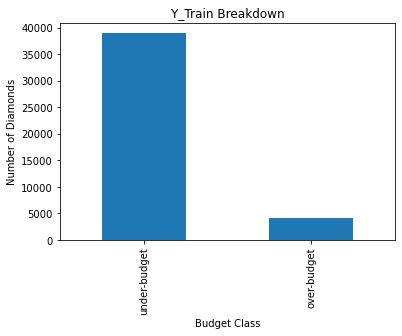

In [4]:
import matplotlib.pyplot as plt
count = y_train.value_counts()
count.plot.bar()
plt.title('Y_Train Breakdown')
plt.ylabel('Number of Diamonds')
plt.xlabel('Budget Class')
plt.show()

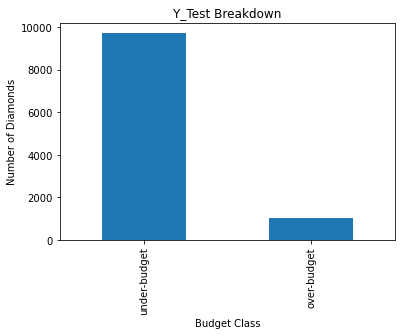

In [5]:
y_test.value_counts()
count = y_test.value_counts()
count.plot.bar()
plt.title('Y_Test Breakdown')
plt.ylabel('Number of Diamonds')
plt.xlabel('Budget Class')
plt.show()

In [6]:
numeric_headers = ['carat', 'depth', 'table', 'x', 'y', 'z']

ss = StandardScaler()
X_train[numeric_headers] = ss.fit_transform(X_train[numeric_headers].values)
X_test[numeric_headers] = ss.transform(X_test[numeric_headers].values)

In [7]:
X_train.head()

,carat,cut,color,clarity,depth,table,x,y,z
43655,-0.374248,Fair,E,SI2,-2.486421,1.142697,-0.026386,-0.194288,-0.391598
21140,1.501979,Ideal,I,VS2,0.384010,-0.199902,1.380810,1.423050,1.441194
41518,-0.521817,Very Good,I,VS2,-2.276390,2.127269,-0.302481,-0.289937,-0.532582
25950,3.272800,Very Good,I,SI2,-2.276390,-0.199902,2.663318,2.640401,2.230704
32424,-1.006684,Very Good,E,VS1,-0.456116,1.053190,-1.157487,-1.115997,-1.167010


In [8]:
categorical_headers = ['cut', 'color', 'clarity']

for col in categorical_headers:
    X_train[col] = X_train[col].str.strip()
    X_test[col] = X_test[col].str.strip()
    lb = LabelEncoder()
    X_train[col+'_int'] = lb.fit_transform(X_train[col])
    X_test[col+'_int'] = lb.transform(X_test[col])

In [9]:
X_train.head()

,carat,cut,color,clarity,depth,table,x,y,z,cut_int,color_int,clarity_int
43655,-0.374248,Fair,E,SI2,-2.486421,1.142697,-0.026386,-0.194288,-0.391598,0,1,3
21140,1.501979,Ideal,I,VS2,0.384010,-0.199902,1.380810,1.423050,1.441194,2,5,5
41518,-0.521817,Very Good,I,VS2,-2.276390,2.127269,-0.302481,-0.289937,-0.532582,4,5,5
25950,3.272800,Very Good,I,SI2,-2.276390,-0.199902,2.663318,2.640401,2.230704,4,5,3
32424,-1.006684,Very Good,E,VS1,-0.456116,1.053190,-1.157487,-1.115997,-1.167010,4,1,4


In [10]:
categorical_headers_ints = [x +'_int' for x in categorical_headers]

In [11]:
tmp = LabelEncoder()
y_train = tmp.fit_transform(y_train)
y_test = tmp.transform(y_test)

(0.9715809669992326, 0.9840946685328922)

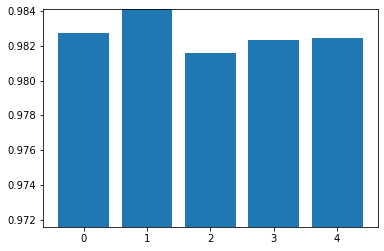

In [13]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, ShuffleSplit
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit

from sklearn.metrics import make_scorer, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

from sklearn.linear_model import LogisticRegression

# these imports above might help you

#=====Write your code below here=================
# select model
clf = LogisticRegression()
#select cross validation
# I changed the cross validation technique to StratifiedKFold
cv = ShuffleSplit(n_splits=5)
# select evaluation criteria
#here I changed the scoring measure to f1_score to account for both recall and precision
my_scorer = make_scorer(f1_score)
# run model training and cross validation
per_fold_eval_criteria = cross_val_score(estimator=clf,
                                    X=X_train[categorical_headers_ints+numeric_headers],
                                    y=y_train,
                                    cv=cv,
                                    scoring=my_scorer,
                                   )

plt.bar(range(len(per_fold_eval_criteria)),per_fold_eval_criteria)
plt.ylim([min(per_fold_eval_criteria)-0.01,max(per_fold_eval_criteria)])

[1 points] Identify groups of features in your data that should be combined into cross-product features. Provide justification for why these features should be crossed (or why some features should not be crossed). 

[1 points] Choose and explain what metric(s) you will use to evaluate your algorithm’s performance. You should give a detailed argument for why this (these) metric(s) are appropriate on your data. That is, why is the metric appropriate for the task (e.g., in terms of the business case for the task). Please note: rarely is accuracy the best evaluation metric to use. Think deeply about an appropriate measure of performance.

[1 points] Choose the method you will use for dividing your data into training and testing (i.e., are you using Stratified 10-fold cross validation? Shuffle splits? Why?). Explain why your chosen method is appropriate or use more than one method as appropriate. Argue why your cross validation method is a realistic mirroring of how an algorithm would be used in practice. 

## Wide and Deep Network Modeling

[2 points] Create at least three combined wide and deep networks to classify your data using Keras. Visualize the performance of the network on the training data and validation data in the same plot versus the training iterations. Note: use the "history" return parameter that is part of Keras "fit" function to easily access this data.

In [14]:
from sklearn import metrics as mt
import tensorflow as tf
from tensorflow import keras 

print(tf.__version__)
print(keras.__version__)

2.9.1
2.9.0


In [15]:
from tensorflow.keras.layers import Dense, Activation, Input, Embedding, concatenate
from tensorflow.keras.models import Model

In [16]:
for col in categorical_headers:
    vals = X_train[col].unique()
    print(col,'has', len(vals), 'unique values:')
    print(vals)

cut has 5 unique values:
['Fair' 'Ideal' 'Very Good' 'Good' 'Premium']
color has 7 unique values:
['E' 'I' 'G' 'D' 'J' 'H' 'F']
clarity has 8 unique values:
['SI2' 'VS2' 'VS1' 'IF' 'SI1' 'VVS1' 'VVS2' 'I1']


In [18]:
import numpy as np
cols_list = ['cut','color','clarity']

# 1. create crossed labels by string join operation
X_crossed_train = X_train[cols_list].apply(lambda x: '_'.join(x), axis=1)
X_crossed_test = X_test[cols_list].apply(lambda x: '_'.join(x), axis=1)

# combine together for training
all_vals = np.hstack((X_crossed_train.to_numpy(),  X_crossed_test.to_numpy()))
#print(np.unique(all_vals))
    
# 2. encode as integers, stacking all possibilities
enc = LabelEncoder()
enc.fit(all_vals)

encoded_vals_train = enc.transform(X_crossed_train)
encoded_vals_test  = enc.transform(X_crossed_test)

#print(np.min(encoded_vals_train), np.max(encoded_vals_train))

## Wide and Deep Model 1

In [23]:
cross_columns = [
                 ['cut', 'color'],
                 ['cut','clarity'],
                 #['color','clarity'],
                 ['cut','color','clarity'],
                ]

cross_col_df_names = []
for cols_list in cross_columns:
    # encode as ints for the embedding
    enc = LabelEncoder()
    
    # 1. create crossed labels by join operation
    X_crossed_train = X_train[cols_list].apply(lambda x: '_'.join(x), axis=1)
    X_crossed_test = X_test[cols_list].apply(lambda x: '_'.join(x), axis=1)
    
    # get a nice name for this new crossed column
    cross_col_name = '_'.join(cols_list)
    
    # 2. encode as integers, stacking all possibilities
    enc.fit(np.hstack((X_crossed_train.to_numpy(),  X_crossed_test.to_numpy())))
    
    # 3. Save into dataframe with new name
    X_train[cross_col_name] = enc.transform(X_crossed_train)
    X_test[cross_col_name] = enc.transform(X_crossed_test)
    
    # keep track of the new names of the crossed columns
    cross_col_df_names.append(cross_col_name) 
    
cross_col_df_names

['cut_color', 'cut_clarity', 'cut_color_clarity']

In [24]:
X_train_cat = X_train[categorical_headers_ints].to_numpy() 
X_test_cat = X_test[categorical_headers_ints].to_numpy() 

In [25]:
X_train_num =  X_train[numeric_headers].to_numpy()
X_test_num = X_test[numeric_headers].to_numpy()

In [26]:
X_train_crossed = X_train[cross_col_df_names].to_numpy()
X_test_crossed = X_test[cross_col_df_names].to_numpy()

In [45]:
crossed_outputs = []

input_crossed = Input(shape=(X_train_crossed.shape[1],), dtype='int64', name='wide_inputs')
for idx,col in enumerate(cross_col_df_names):
    
    N = max(X_train[col].max(),X_test[col].max())+1
    
    x = tf.gather(input_crossed, idx, axis=1)
    
    x = Embedding(input_dim=N, 
                  output_dim=int(np.sqrt(N)), 
                  input_length=1, name=col+'_embed')(x)

    crossed_outputs.append(x)
    
wide_branch = concatenate(crossed_outputs, name='wide_concat')

all_deep_branch_outputs = []

input_cat = Input(shape=(X_train_cat.shape[1],), dtype='int64', name='categorical_input')
for idx,col in enumerate(categorical_headers_ints):
    
    N = max(X_train[col].max(),X_test[col].max())+1
    
    x = tf.gather(input_cat, idx, axis=1)
    
    x = Embedding(input_dim=N, 
                  output_dim=int(np.sqrt(N)), 
                  input_length=1, name=col+'_embed')(x)
    
    all_deep_branch_outputs.append(x)

input_num = Input(shape=(X_train_num.shape[1],), name='numerical_input')
x_dense = Dense(units=20, activation='relu',name='num_1')(input_num)
    
all_deep_branch_outputs.append(x_dense)

deep_branch = concatenate(all_deep_branch_outputs,name='concat_embeds')
deep_branch = Dense(units=40,activation='relu', name='deep1')(deep_branch)
deep_branch = Dense(units=20,activation='relu', name='deep2')(deep_branch)
deep_branch = Dense(units=10,activation='relu', name='deep3')(deep_branch)

final_branch = concatenate([wide_branch, deep_branch],
                           name='concat_deep_wide')
final_branch = Dense(units=1,activation='sigmoid',
                     name='combined')(final_branch)

model = Model(inputs=[input_crossed,input_cat,input_num], 
              outputs=final_branch)

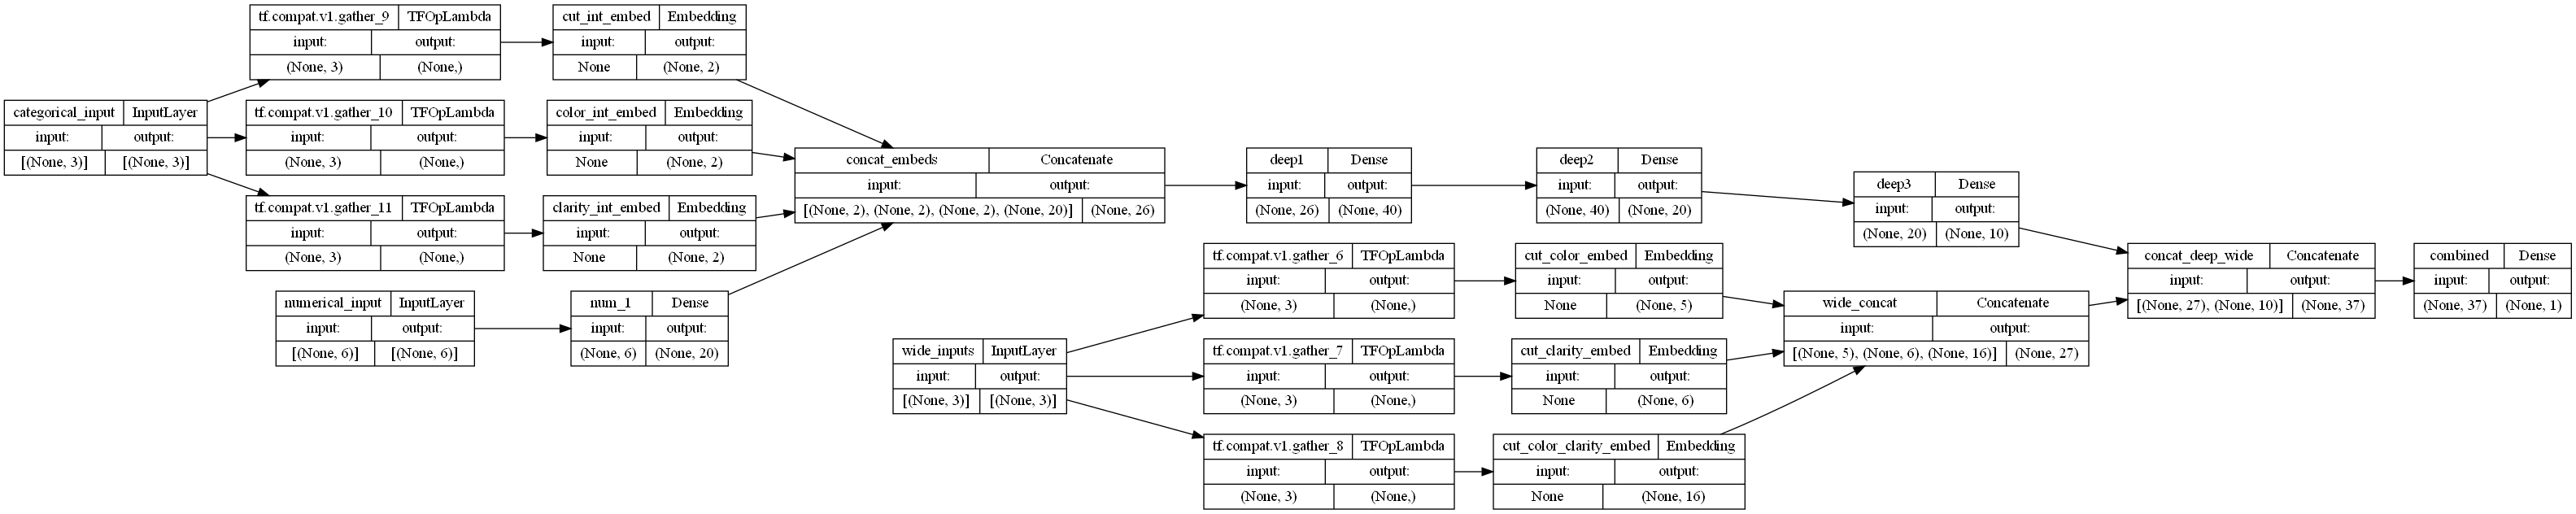

In [46]:
from tensorflow.keras.utils import plot_model
plot_model(
    model, to_file='model.png', show_shapes=True, show_layer_names=True,
    rankdir='LR', expand_nested=False, dpi=96
)

In [47]:
import keras.backend as K
def get_f1(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [48]:
%%time

model.compile(optimizer='SGD',
              loss='mean_squared_error',
              metrics='Accuracy')

# lets also add the history variable to see how we are doing
# and lets add a validation set to keep track of our progress
history = model.fit([X_train_crossed,X_train_cat,X_train_num],
                    y_train, 
                    epochs=15, 
                    batch_size=32, 
                    verbose=1, 
                    validation_data = ([X_test_crossed,X_test_cat,X_test_num],y_test))

Epoch 1/15
1349/1349 [==============================] - 13s 8ms/step - loss: 0.0848 - Accuracy: 0.9034 - val_loss: 0.0582 - val_Accuracy: 0.9018
Epoch 2/15
1349/1349 [==============================] - 10s 7ms/step - loss: 0.0521 - Accuracy: 0.9036 - val_loss: 0.0480 - val_Accuracy: 0.9029
Epoch 3/15
1349/1349 [==============================] - 9s 7ms/step - loss: 0.0434 - Accuracy: 0.9370 - val_loss: 0.0397 - val_Accuracy: 0.9526
Epoch 4/15
1349/1349 [==============================] - 10s 7ms/step - loss: 0.0360 - Accuracy: 0.9536 - val_loss: 0.0343 - val_Accuracy: 0.9547
Epoch 5/15
1349/1349 [==============================] - 10s 7ms/step - loss: 0.0328 - Accuracy: 0.9550 - val_loss: 0.0328 - val_Accuracy: 0.9552
Epoch 6/15
1349/1349 [==============================] - 10s 7ms/step - loss: 0.0316 - Accuracy: 0.9560 - val_loss: 0.0318 - val_Accuracy: 0.9562
Epoch 7/15
1349/1349 [==============================] - 10s 7ms/step - loss: 0.0308 - Accuracy: 0.9570 - val_loss: 0.0314 - val_Acc

In [49]:
%%time

model.compile(optimizer='SGD',
              loss='mean_squared_error',
              metrics='Accuracy')

# lets also add the history variable to see how we are doing
# and lets add a validation set to keep track of our progress
history = model.fit([X_train_crossed,X_train_cat,X_train_num],
                    y_train, 
                    epochs=15, 
                    batch_size=32, 
                    verbose=1, 
                    validation_data = ([X_test_crossed,X_test_cat,X_test_num],y_test))

Epoch 1/15
1349/1349 [==============================] - 6s 4ms/step - loss: 0.0212 - Accuracy: 0.9733 - val_loss: 0.0217 - val_Accuracy: 0.9720
Epoch 2/15
1349/1349 [==============================] - 4s 3ms/step - loss: 0.0195 - Accuracy: 0.9756 - val_loss: 0.0199 - val_Accuracy: 0.9741
Epoch 3/15
1349/1349 [==============================] - 5s 3ms/step - loss: 0.0181 - Accuracy: 0.9781 - val_loss: 0.0184 - val_Accuracy: 0.9774
Epoch 4/15
1349/1349 [==============================] - 6s 4ms/step - loss: 0.0169 - Accuracy: 0.9795 - val_loss: 0.0172 - val_Accuracy: 0.9791
Epoch 5/15
1349/1349 [==============================] - 5s 3ms/step - loss: 0.0160 - Accuracy: 0.9803 - val_loss: 0.0166 - val_Accuracy: 0.9793
Epoch 6/15
1349/1349 [==============================] - 4s 3ms/step - loss: 0.0153 - Accuracy: 0.9811 - val_loss: 0.0156 - val_Accuracy: 0.9816
Epoch 7/15
1349/1349 [==============================] - 5s 4ms/step - loss: 0.0148 - Accuracy: 0.9815 - val_loss: 0.0155 - val_Accuracy:

In [50]:
yhat = np.round(model.predict([X_test_crossed,X_test_cat,X_test_num]))
print(mt.confusion_matrix(y_test,yhat))
print(mt.classification_report(y_test,yhat))

338/338 [==============================] - 1s 1ms/step
[[ 944  115]
 [  75 9655]]
              precision    recall  f1-score   support

           0       0.93      0.89      0.91      1059
           1       0.99      0.99      0.99      9730

    accuracy                           0.98     10789
   macro avg       0.96      0.94      0.95     10789
weighted avg       0.98      0.98      0.98     10789



Text(0.5, 0, 'epochs')

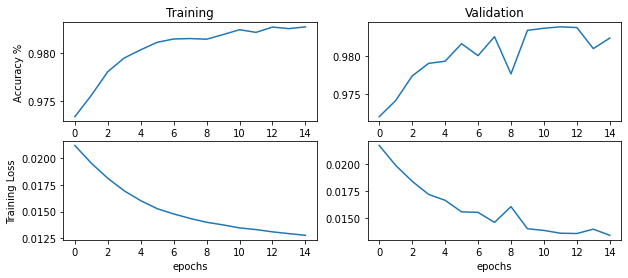

In [51]:
from matplotlib import pyplot as plt

%matplotlib inline

plt.figure(figsize=(10,4))
plt.subplot(2,2,1)
plt.plot(history.history['Accuracy'])

plt.ylabel('Accuracy %')
plt.title('Training')
plt.subplot(2,2,2)
plt.plot(history.history['val_Accuracy'])
plt.title('Validation')

plt.subplot(2,2,3)
plt.plot(history.history['loss'])
plt.ylabel('Training Loss')
plt.xlabel('epochs')

plt.subplot(2,2,4)
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')

[2 points] Investigate generalization performance by altering the number of layers in the deep branch of the network. Try at least two different number of layers. Use the method of cross validation and evaluation metric that you argued for at the beginning of the lab to select the number of layers that performs superiorly. 

[1 points] Compare the performance of your best wide and deep network to a standard multi-layer perceptron (MLP). Alternatively, you can compare to a network without the wide branch (i.e., just the deep network). For classification tasks, compare using the receiver operating characteristic and area under the curve. For regression tasks, use Bland-Altman plots and residual variance calculations.  Use proper statistical methods to compare the performance of different models.

In [ ]:
from scipy.special import expit
import sys 
class TwoLayerPerceptron(object):
    def __init__(self, n_hidden=1,
                 C=0.0, epochs=500, eta=0.1, random_state=None, shuffle=True, 
                 minibatches=1):
        np.random.seed(random_state)
        self.n_hidden = n_hidden
        self.l2_C = C
        self.epochs = epochs
        self.eta = eta
        self.shuffle = shuffle
        self.minibatches = minibatches

    @staticmethod
    def _encode_labels(y):
        onehot = pd.get_dummies(y).values.T
            
        return onehot
        
    def _initialize_weights(self):
        init_bound = 4*np.sqrt(6. / (self.n_hidden + self.n_features_ + 1))
        W1 = np.random.uniform(-init_bound, init_bound,(self.n_hidden, self.n_features_ + 1))
        W1[:,:1] = 0

        init_bound = 4*np.sqrt(6 / (self.n_output_ + self.n_hidden + 1))
        W2 = np.random.uniform(-init_bound, init_bound,(self.n_output_, self.n_hidden + 1)) 
        W2[:,:1] = 0
        
        return W1, W2
    
    @staticmethod
    def _sigmoid(z):
        return expit(z)
    
    @staticmethod
    def _add_bias_unit(X, how='column'):
        if how == 'column':
            ones = np.ones((X.shape[0], 1))
            X_new = np.hstack((ones, X))
        elif how == 'row':
            ones = np.ones((1, X.shape[1]))
            X_new = np.vstack((ones, X))
        return X_new
    
    @staticmethod
    def _L2_reg(lambda_, W1, W2):
        return (lambda_/2.0) * np.sqrt(np.mean(W1[:, 1:] ** 2) + np.mean(W2[:, 1:] ** 2))
    
    def _cost(self,A3,Y_enc,W1,W2):
        cost = -np.mean(np.nan_to_num((Y_enc*np.log(A3)+(1-Y_enc)*np.log(1-A3))))
        L2_term = self._L2_reg(self.l2_C, W1, W2)
        return cost + L2_term
    
    def _feedforward(self, X, W1, W2):
        A1 = self._add_bias_unit(X, how='column')
        A1 = A1.T
        Z1 = W1 @ A1
        A2 = self._sigmoid(Z1)
        A2 = self._add_bias_unit(A2, how='row')
        Z2 = W2 @ A2
        A3 = self._sigmoid(Z2)
        return A1, Z1, A2, Z2, A3
    
    def _get_gradient(self, A1, A2, A3, Z1, Z2, Y_enc, W1, W2):
        V2 = (A3-Y_enc)
        V1 = A2*(1-A2)*(W2.T @ V2)
        
        grad2 = V2 @ A2.T
        grad1 = V1[1:,:] @ A1.T

        grad1[:, 1:] += W1[:, 1:] * self.l2_C
        grad2[:, 1:] += W2[:, 1:] * self.l2_C

        return grad1, grad2

    def fit(self, X, y, print_progress=False, XY_test=None):
        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)
        
        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.W1, self.W2 = self._initialize_weights()
        
        self.grad_W1_ = np.zeros(self.epochs)
        self.grad_W2_ = np.zeros(self.epochs)

        self.cost_ = []
        self.score_ = []
        self.score_.append(accuracy_score(y_data,self.predict(X_data)))
        if XY_test is not None:
            X_test = XY_test[0].copy()
            y_test = XY_test[1].copy()
            self.val_score_ = []
            self.val_score_.append(accuracy_score(y_test,self.predict(X_test)))
            
        for i in range(self.epochs):

            if print_progress>0 and (i+1)%print_progress==0:
                sys.stderr.write('\rEpoch: %d/%d' % (i+1, self.epochs))
                sys.stderr.flush()

            if self.shuffle:
                idx_shuffle = np.random.permutation(y_data.shape[0])
                X_data, Y_enc, y_data = X_data[idx_shuffle], Y_enc[:, idx_shuffle], y_data[idx_shuffle]

            mini = np.array_split(range(y_data.shape[0]), self.minibatches)
            mini_cost = []
            for idx in mini:

                # feedforward of all instances
                A1, Z1, A2, Z2, A3 = self._feedforward(X_data[idx],
                                                       self.W1,
                                                       self.W2)
                
                # append cost of mini-batch only
                cost = self._cost(A3,Y_enc[:, idx],self.W1,self.W2)
                mini_cost.append(cost)

                # compute gradient via back propagation
                grad1, grad2 = self._get_gradient(A1=A1, A2=A2, A3=A3, Z1=Z1, Z2=Z2, 
                                                  Y_enc=Y_enc[:, idx],
                                                  W1=self.W1,W2=self.W2)
                
                #average magnitude of gradient each layers
                self.grad_W1_[i] = np.average(np.sqrt(np.sum(np.square(grad1))))
                self.grad_W2_[i] = np.average(np.sqrt(np.sum(np.square(grad2))))


                #Update each matrix to minimize objective
                self.W1 -= self.eta * grad1
                self.W2 -= self.eta * grad2

            self.cost_.append(mini_cost)
            self.score_.append(accuracy_score(y_data,self.predict(X_data)))
            if XY_test is not None:
                self.val_score_.append(accuracy_score(y_test,self.predict(X_test)))
            
        return self
    
    def predict(self, X):
        _, _, _, _, A3 = self._feedforward(X, self.W1, self.W2)
        y_pred = np.argmax(A3, axis=0)
        return y_pred

In [ ]:
params = { 'n_hidden':22, 
         'C':0.01, 'epochs':15, 'eta':0.01,'minibatches':35,
         'shuffle':True,'random_state':1}

In [ ]:
%%time
nn_2 = TwoLayerPerceptron(**params)

nn_2.fit(np.concatenate(X_train_crossed,X_train_cat,X_train_num), y_train, print_progress=1)
yhat = nn_2.predict(np.concatenate(X_test_crossed,X_test_cat,X_test_num))
print('Accuracy:',accuracy_score(y_test,yhat))

### Exceptional Work

One idea (required for 7000 level students): Capture the embedding weights from the deep network and (if needed) perform dimensionality reduction on the output of these embedding layers (only if needed). That is, pass the observations into the network, save the embedded weights (called embeddings), and then perform  dimensionality reduction in order to visualize results. Visualize and explain any clusters in the data.